<a href="https://colab.research.google.com/github/senecamiller/ceudemo/blob/main/Session_06_Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
from plotnine import *

# load data
flights = pd.read_csv('https://raw.githubusercontent.com/misrori/rdata/main/flights.csv')
airlines = pd.read_csv('https://raw.githubusercontent.com/misrori/rdata/main/airlines.csv')
planes = pd.read_csv('https://raw.githubusercontent.com/misrori/rdata/main/planes.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/misrori/rdata/main/weather.csv')


# Plotnine structure
## 1. Your data


```
ggplot(your_data)
```

## 2. aesthetics your y, x, color, size, shape  values
```
aes(x)
aes(x, y)
aes(x, y, color, shappe, size)
```


## 3. geometric
```
geom_point()
geom_col()
geom_bar(stat='identity')

```
geom_***

https://plotnine.org/reference/#geoms

## 4. labs
```
labs( title =" ", subtitle = " ",  x=" ", y =" " )

```


## 5. Change theme

```
theme_bw()
theme_minimal()
theme(figure_size = (25, 8))
```
https://plotnine.org/reference/#themes

## 6.extra

```
facet_wrap()
cord_flip()
```
https://plotnine.org/reference/#facets

# Plotly structure

https://plotly.com/python/plotly-express/



```
plotly_plot = px.bar(df, x='', y='', color='')
plotly_plot.update_layout(title='', xaxis_title = '', yaxis_title = '', plot_bgcolor="white")
plotly_plot.show()
```




# Task 1: Analyze the Number of Flights by Month for a Specific Airline
##Steps:

- Filter for flights from airline AA (American Airlines).
- Group by month and count the number of flights.
- Plot the number of flights by month using both plotnine and plotly.

In [ ]:
flights


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [8]:
df1 = (
    flights[flights['carrier'] == 'AA']
    .groupby('month', as_index=False)
    .agg(number_of_flights = ('flight', 'count'))
    .sort_values('month')
)

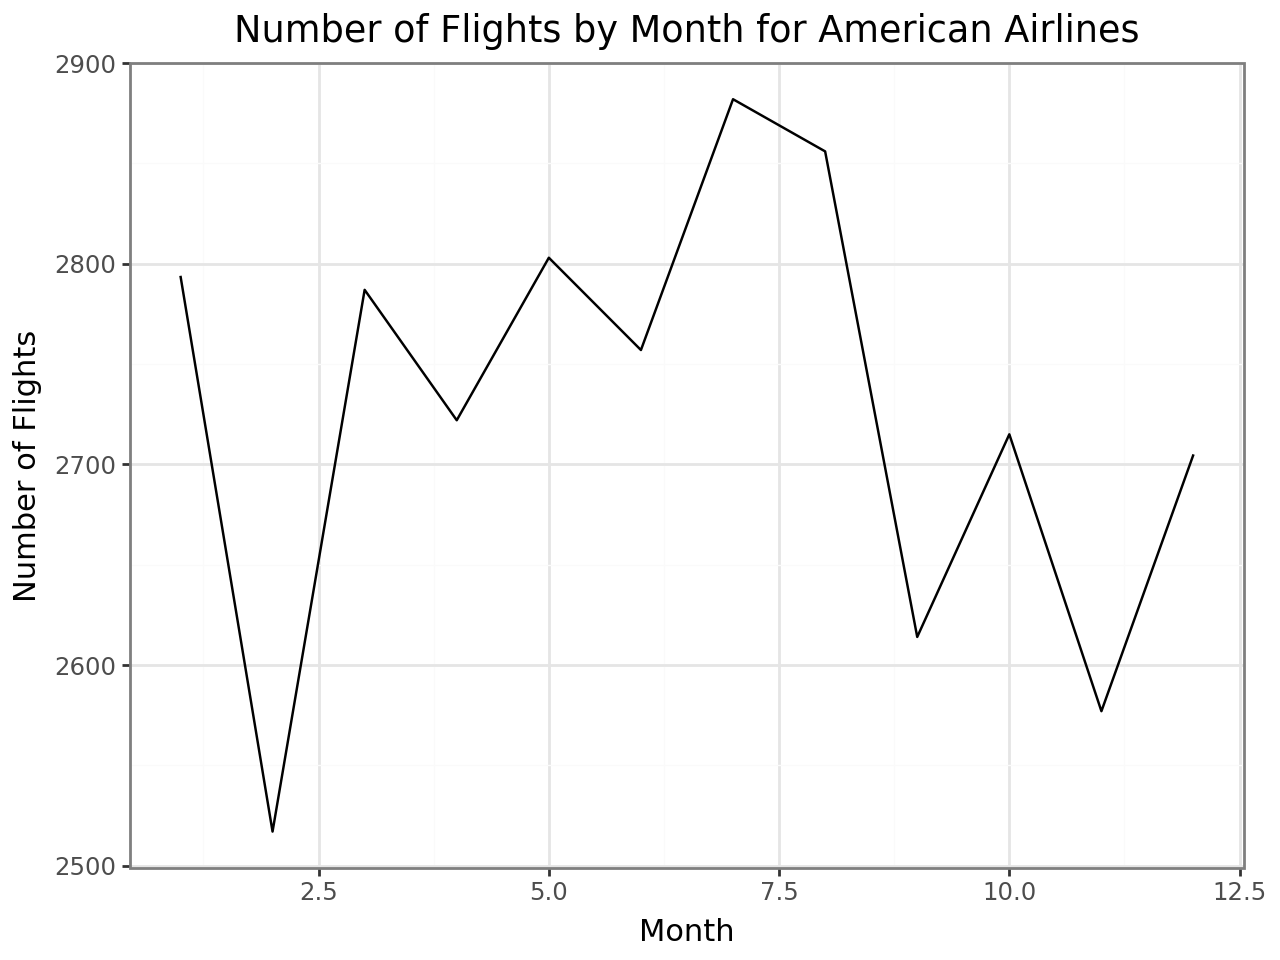

In [9]:
(
    ggplot(df1) +
    aes(x='month', y = 'number_of_flights' ) +
    geom_line()+
    labs(title='Number of Flights by Month for American Airlines', x='Month', y ='Number of Flights') +
    theme_bw()
)

In [10]:
plotly_plot = px.line(df1, x='month', y='number_of_flights' )

plotly_plot.update_layout(title = 'Number of Flights by Month for American Airlines', xaxis_title = 'Month', yaxis_title = 'Number of Flights' , plot_bgcolor='white')
plotly_plot.show()

# Task 2: Calculate and Visualize the Average Delay by Airline and Destination
## Steps:

- Filter for flights departing from JFK in January with non-null arrival delay data.
- Group by carrier and dest.
- Aggregate to calculate the mean of the arr_delay.
- Sort and plot.

In [44]:
df2 = (
    flights[(flights["origin"] == 'JFK') & (flights['month'] == 1) & (flights['arr_delay'].notna())]
    .groupby (['carrier', 'dest'], as_index=False)
    .agg(average_arrival_delay = ("arr_delay", "mean"))
    .sort_values('carrier')
)

In [45]:
df2

,carrier,dest,average_arrival_delay
0,9E,ATL,0.652174
27,9E,SYR,6.500000
26,9E,SAT,-17.444444
25,9E,ROC,15.584615
24,9E,RIC,11.814815
...,...,...,...
121,US,PHL,-2.727273
124,VX,LAX,-12.942308
125,VX,PSP,-15.750000
123,VX,LAS,-15.322581


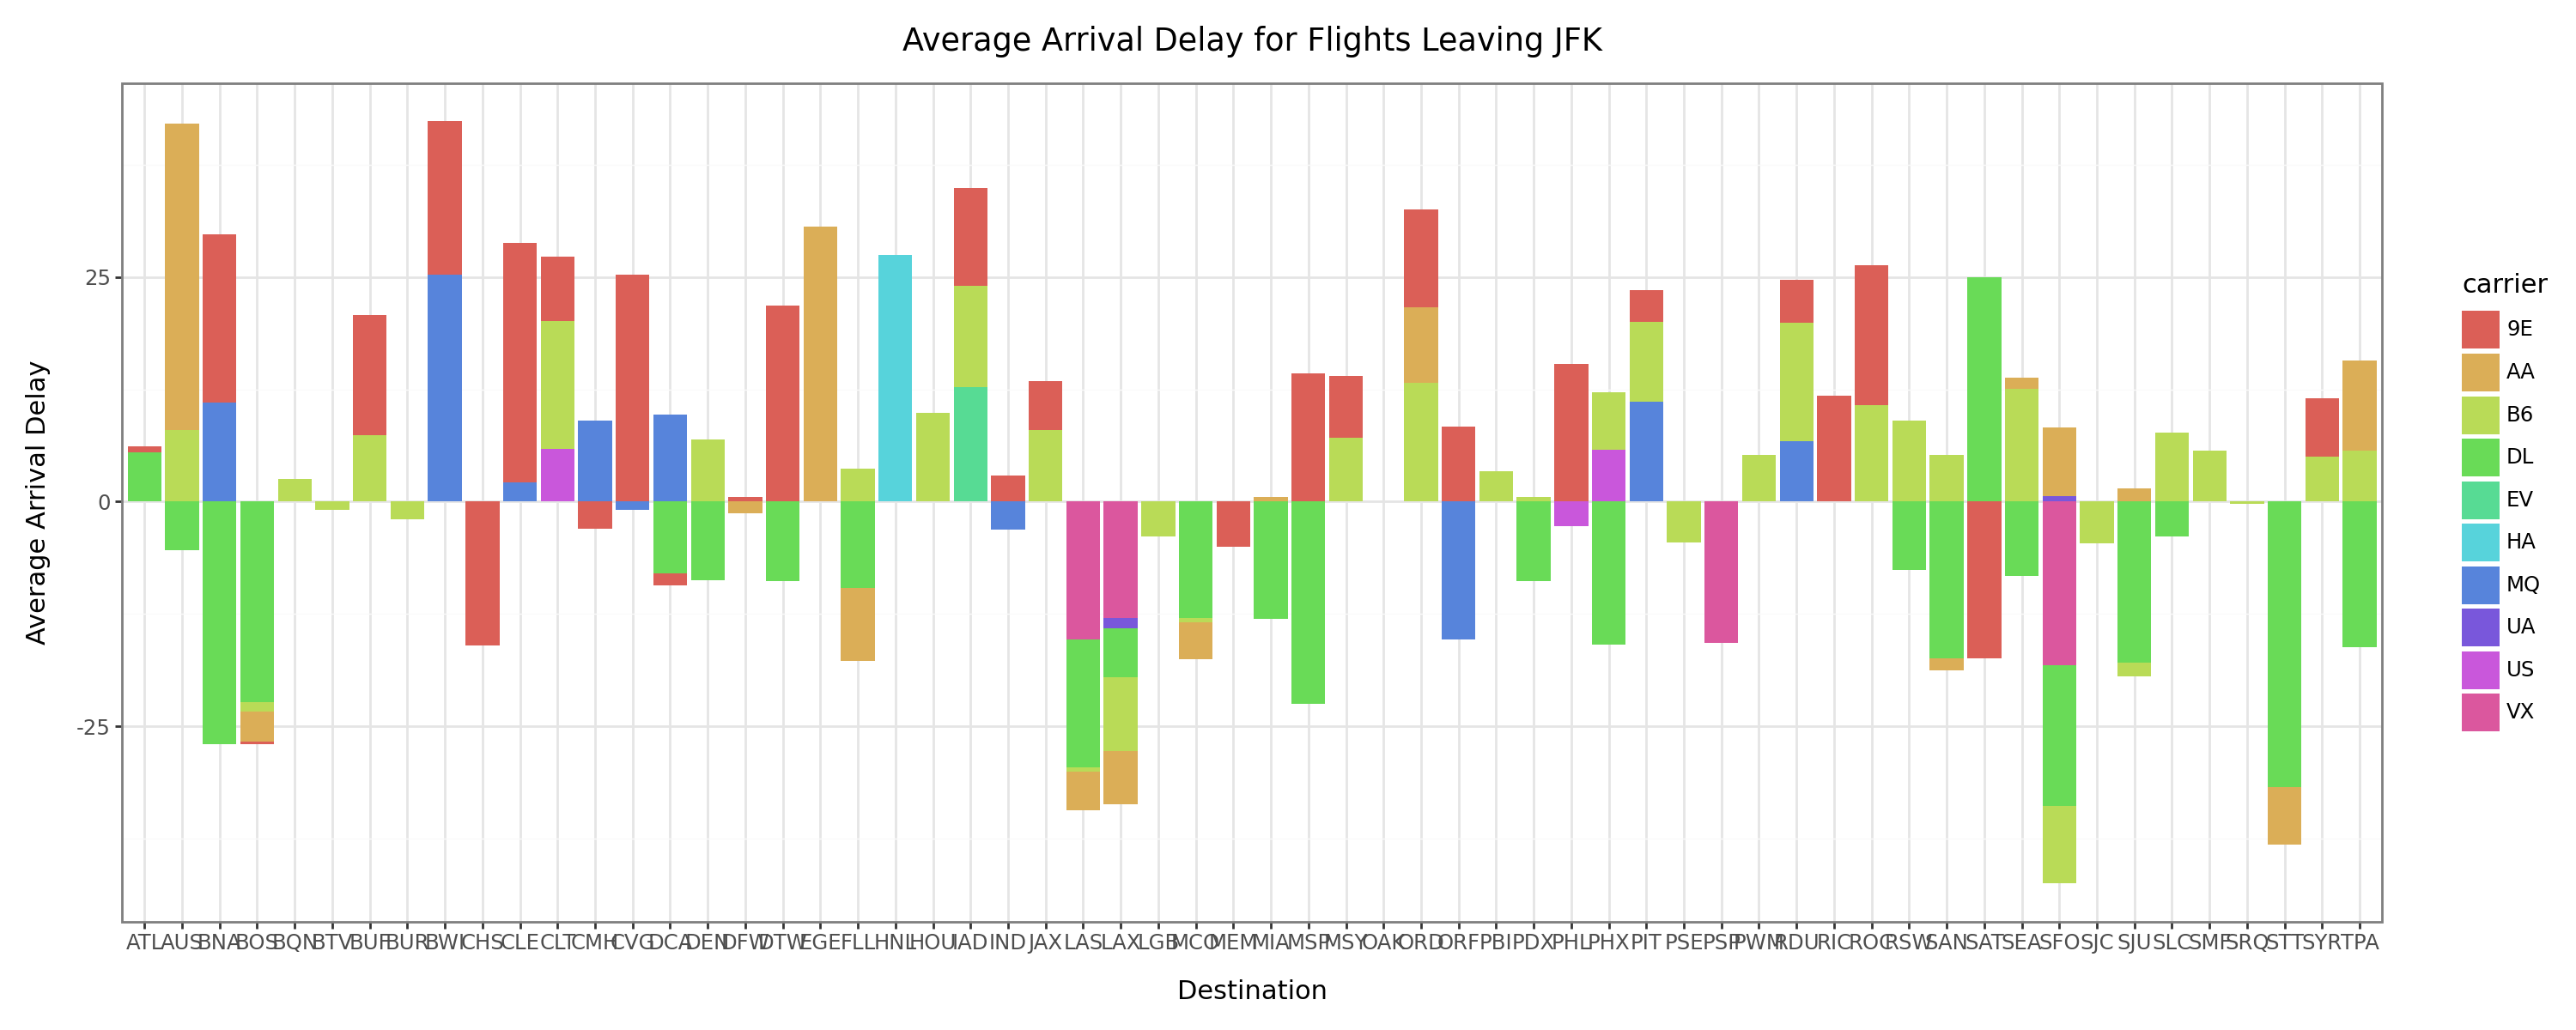

In [62]:
(
    ggplot(df2) +
    aes(x='dest', y='average_arrival_delay', fill='carrier' ) +
    geom_col() +
    labs(title="Average Arrival Delay for Flights Leaving JFK", x='Destination', y='Average Arrival Delay') +
    theme_bw() +
    theme(figure_size = (15,6))
)

In [57]:
plotly_plot = px.bar(df2, x='dest', y='average_arrival_delay', color='carrier' )

plotly_plot.update_layout(title='Average Arrival Delay for Flights Leaving JFK',xaxis_title='Destination',yaxis_title='Average Arrival Delay', plot_bgcolor='white')
plotly_plot.show()

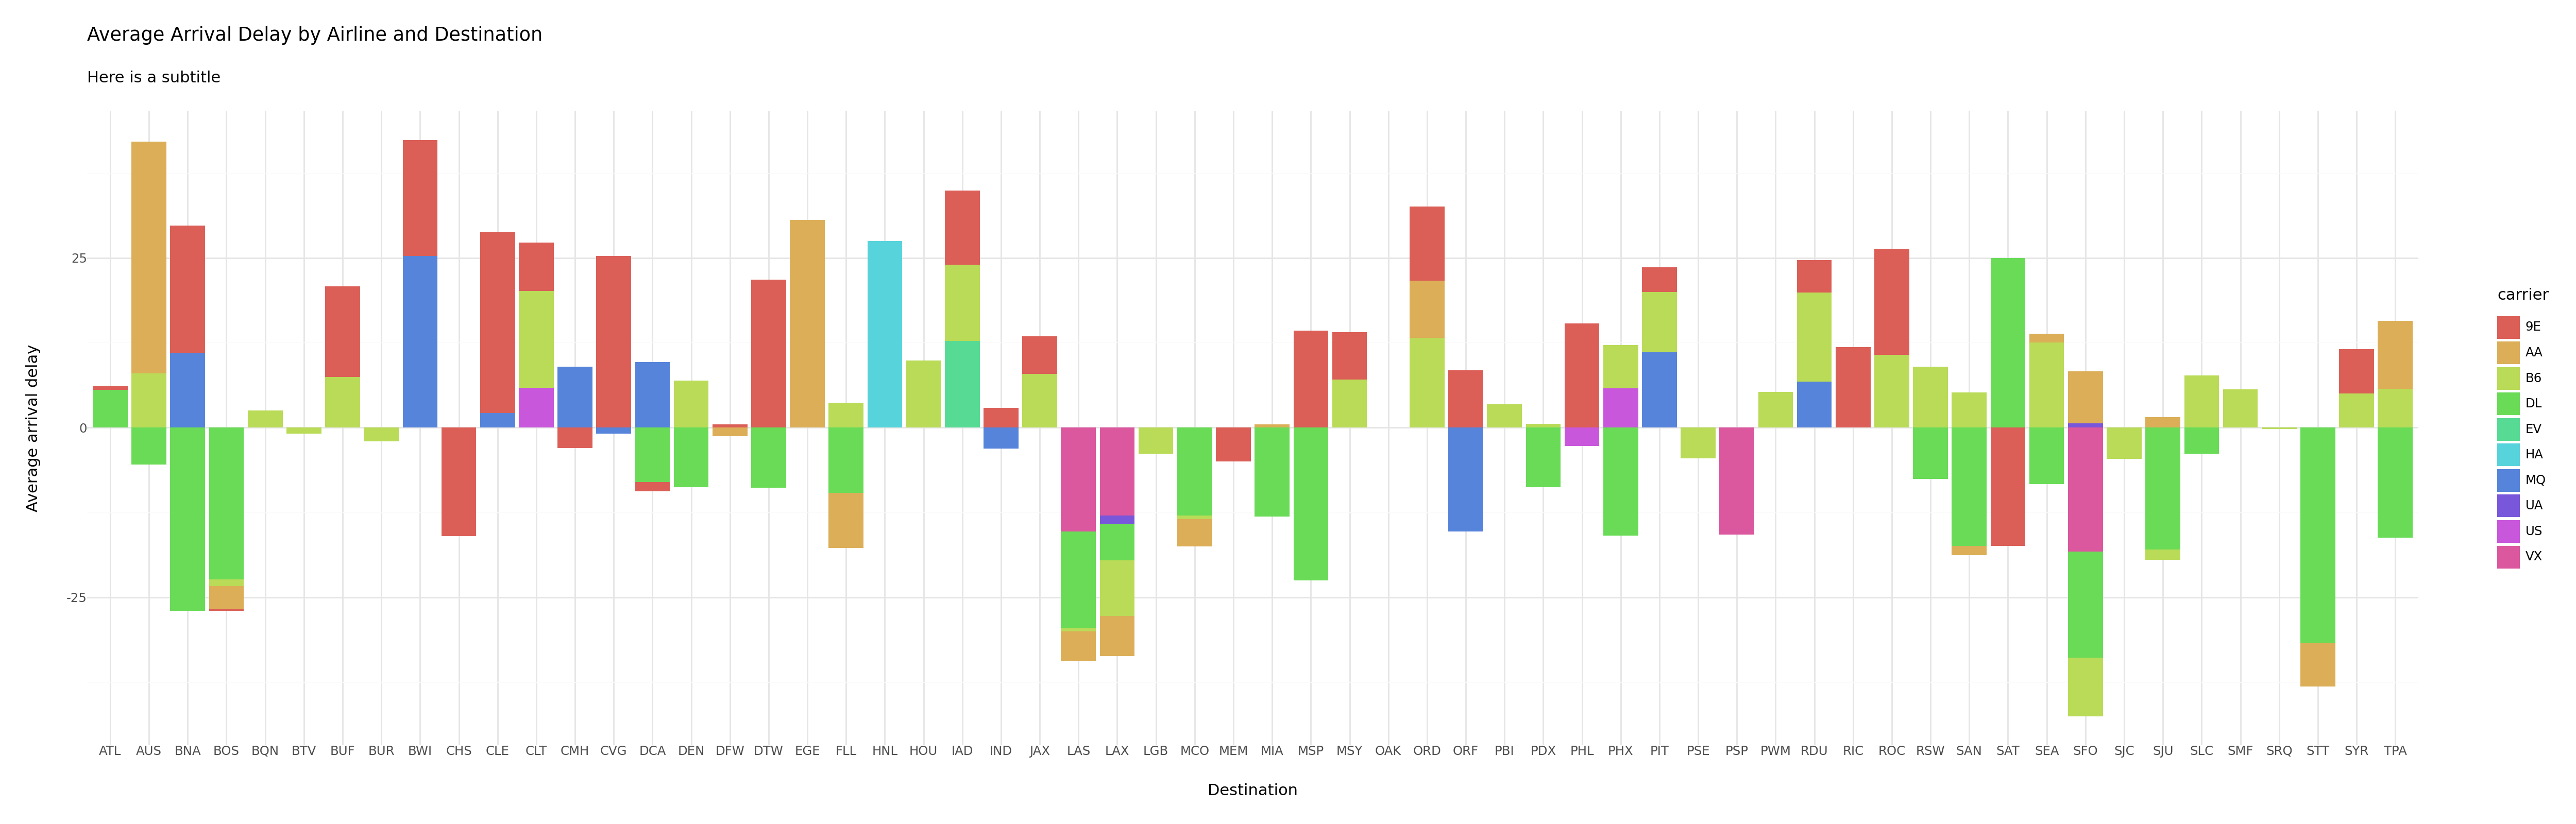

# Task 3: Find the Most Delayed Flight Tail Number and Visualize the Data
## Steps:

- Filter to flights from LAX in January.
- Group by tailnum and calculate the average dep_delay.
- Sort by the largest delay, select the most delayed flight.
- Plot.

In [73]:
df3 = (
    flights[(flights['dest'] == 'LAX') & (flights["month"] == 1)]
    .groupby('tailnum', as_index=False)
    .agg(average_departure_delay = ("dep_delay", "mean"))
    .sort_values ('tailnum')
    .head(10)
)

In [74]:
df3

,tailnum,average_departure_delay
0,N12109,5.000000
1,N12116,52.666667
2,N12125,-1.250000
3,N12221,7.000000
4,N13110,-5.000000
5,N13113,-2.000000
6,N13138,10.800000
7,N14102,15.000000
8,N14106,1.400000
9,N14107,0.000000


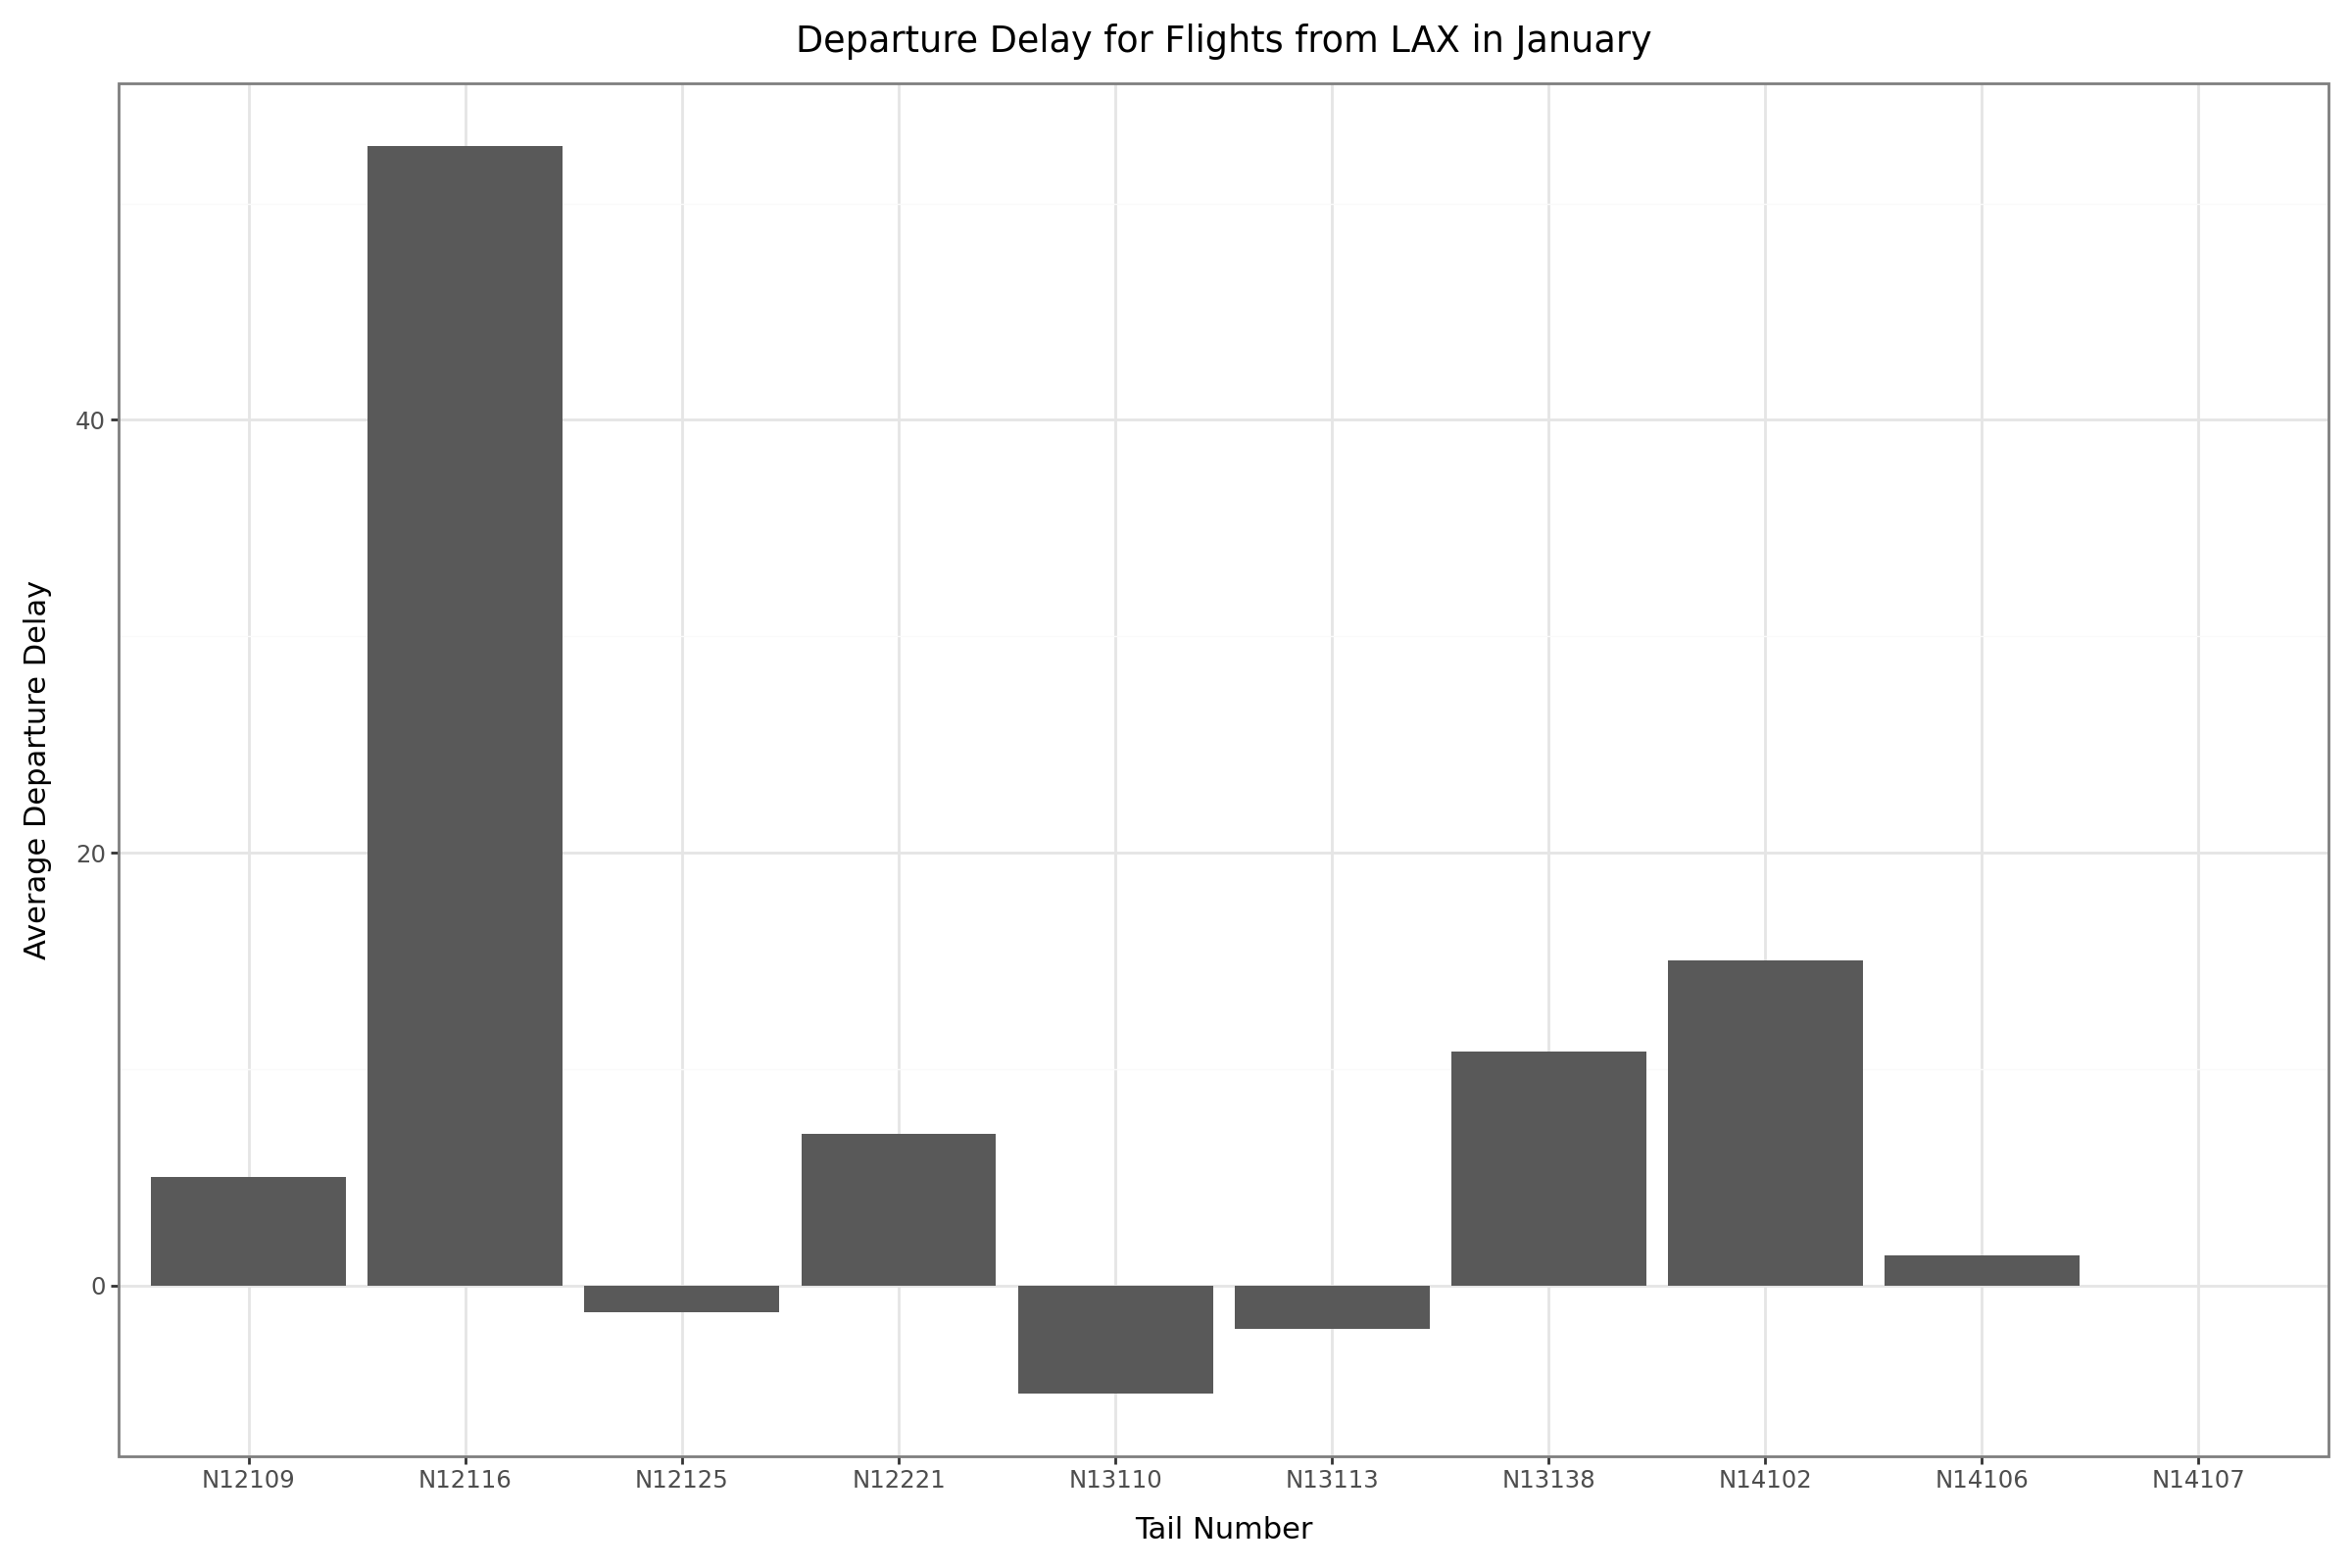

In [86]:
(
    ggplot(df3) +
    aes(x='tailnum', y='average_departure_delay') +
    geom_col() +
    labs(title='Departure Delay for Flights from LAX in January', x='Tail Number', y='Average Departure Delay') +
    theme_bw() +
    theme(figure_size = (12, 8))
)

In [87]:
px.bar(df3, x='tailnum', y='average_departure_delay')

<ipython-input-72-b705ce9634f9>:18: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



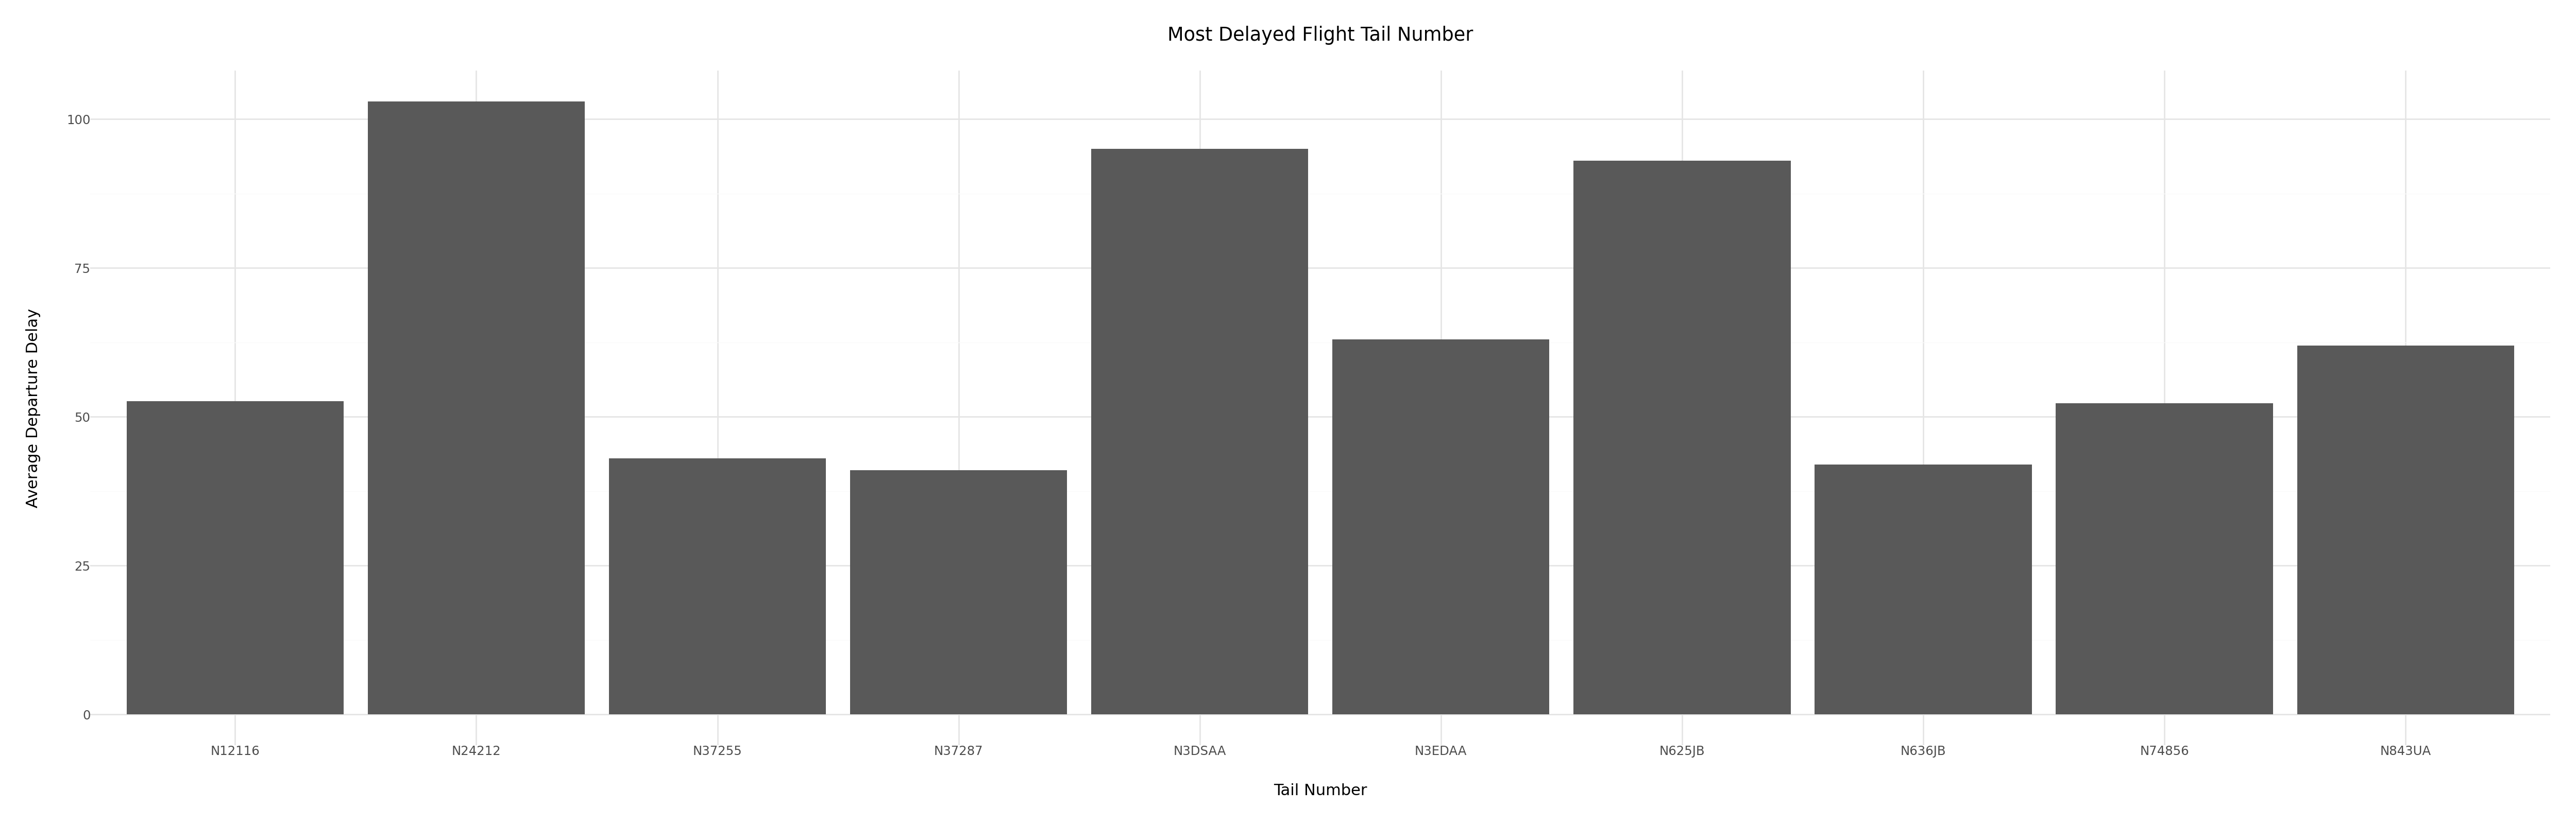

Task 4: Show the number of flights where carrier AA by month and origin



<ipython-input-73-354c1d9ca97b>:18: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



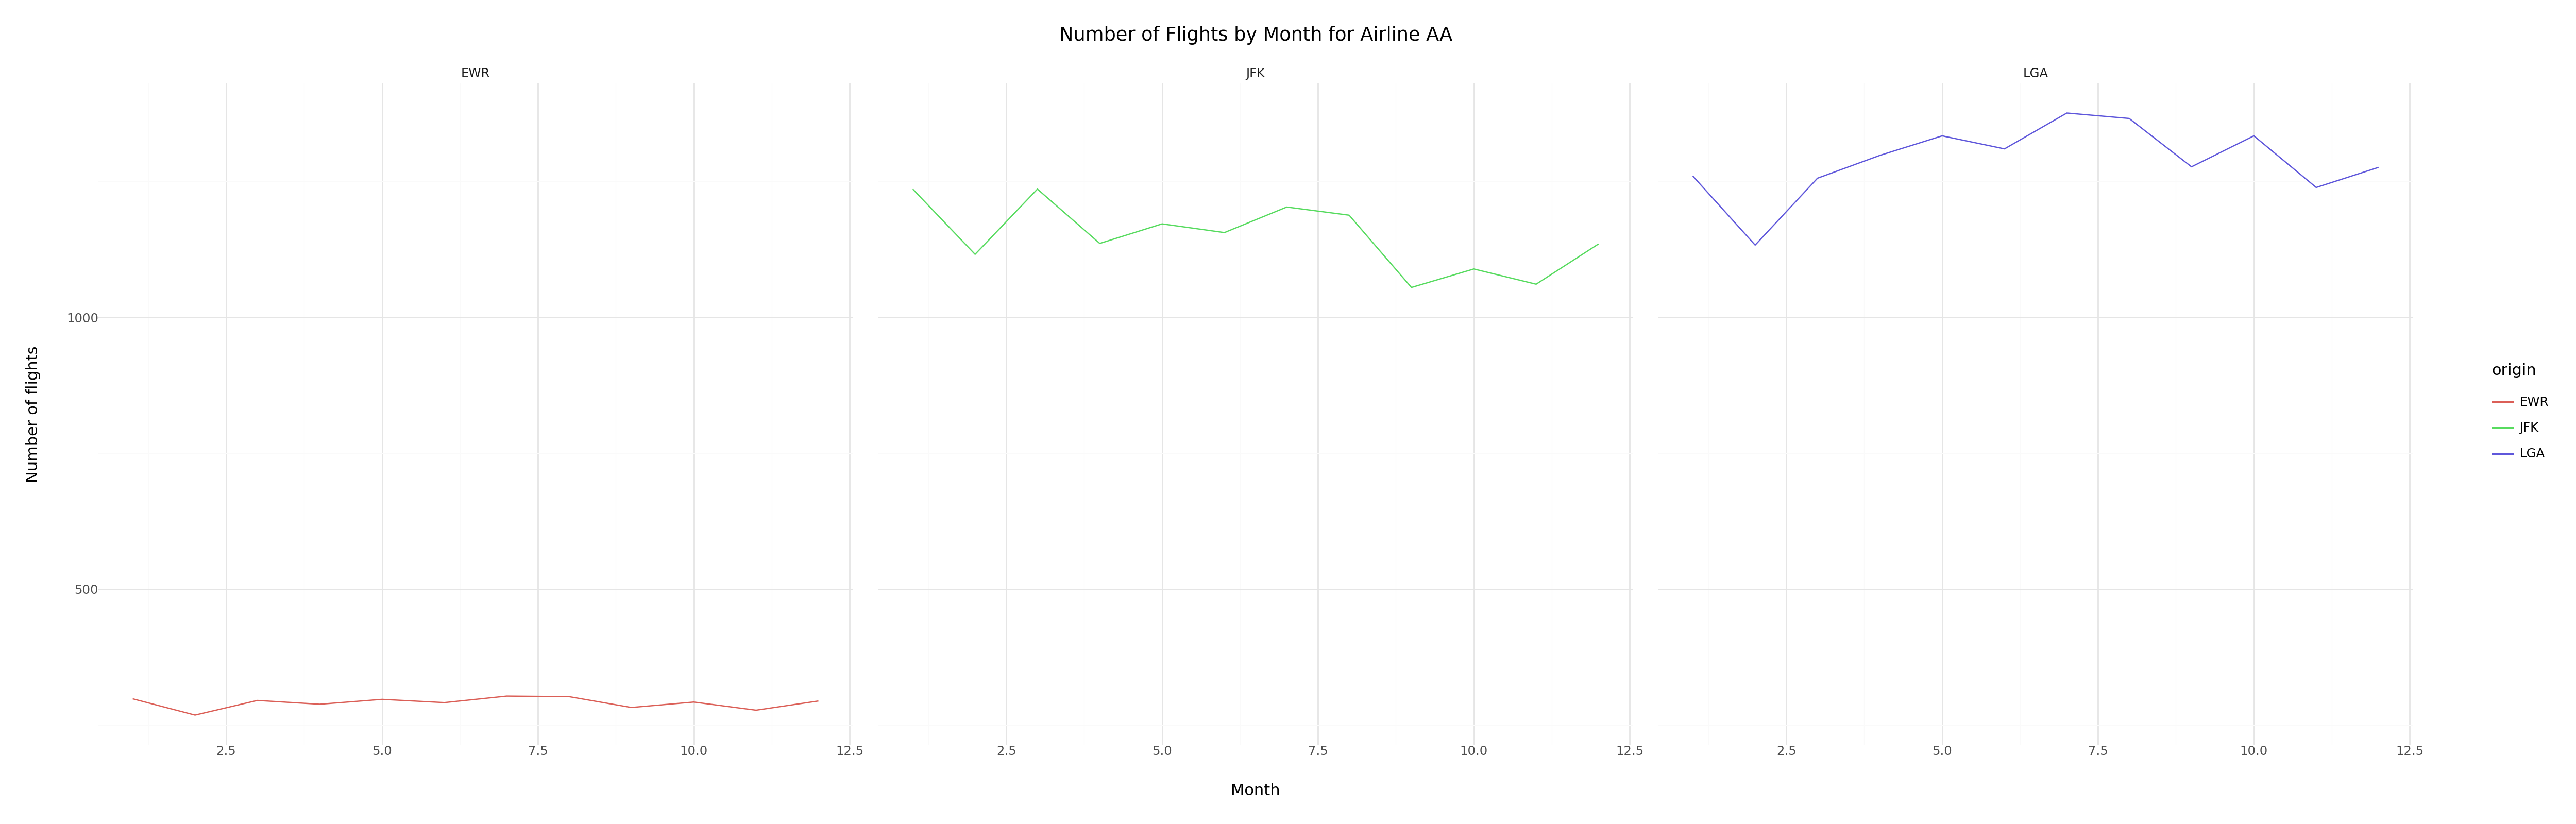

# Task 5

Filter for origin JFK, month 2, arr_delay notna


<ipython-input-74-9ca0a6027dca>:19: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



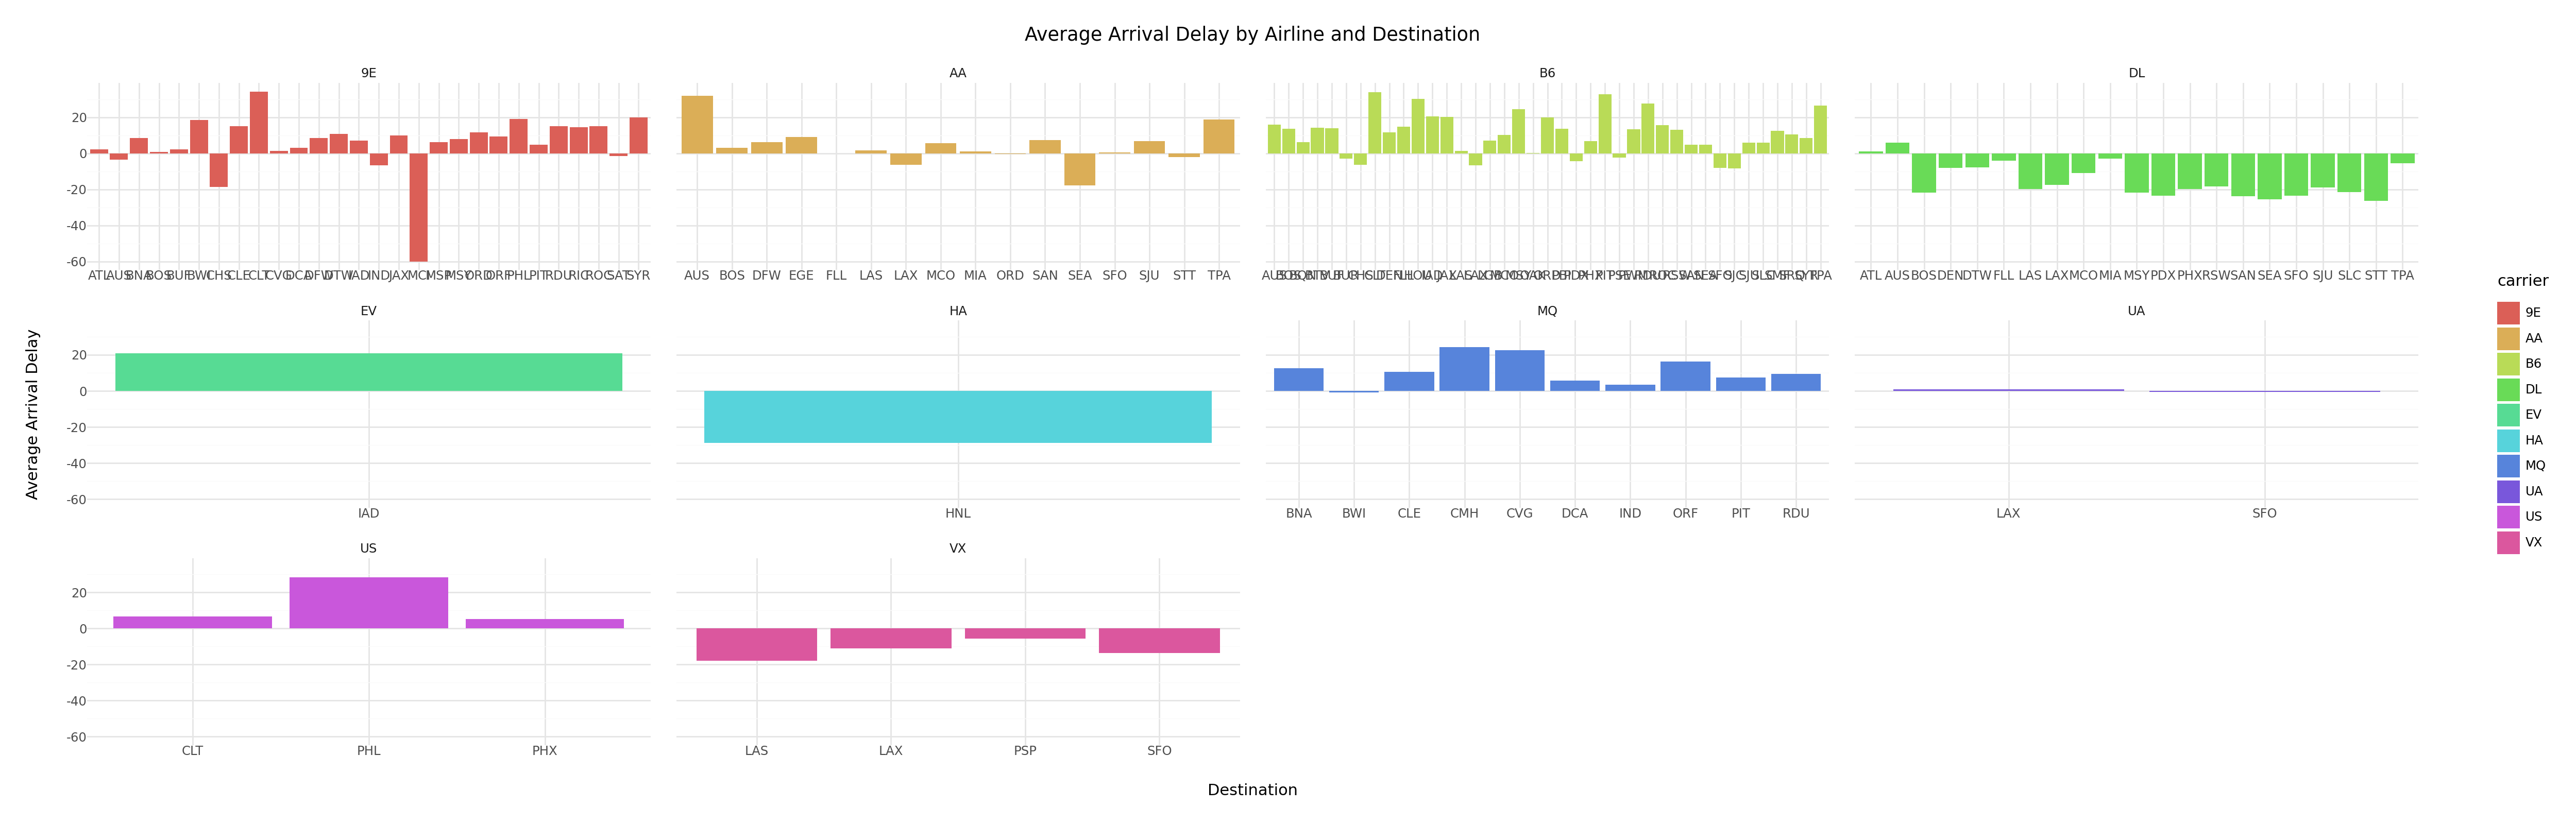

# Task
##Most Popular Destinations for Oldest Planes (older than 1980) where dep_delay > 0

In [ ]:
(
    flights.merge(planes, on='tailnum')
    [flights.merge(planes, on='tailnum')['year_y'] <= 1980]
    .groupby('dest', as_index=False)
    .agg(number_of_flights=('flight', 'count'))
    .sort_values('number_of_flights', ascending=False)
)

,dest,number_of_flights
15,RDU,252
14,ORD,189
7,DFW,166
8,DTW,165
4,CMH,126
2,CLE,77
13,MIA,76
21,XNA,65
17,SFO,61
0,ATL,60


In [ ]:
result = (
    flights.merge(planes, on='tailnum')
    .query('year_y < 1980 and dep_delay > 0')
    # ... continue here
)


<ipython-input-77-95467935cb70>:9: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



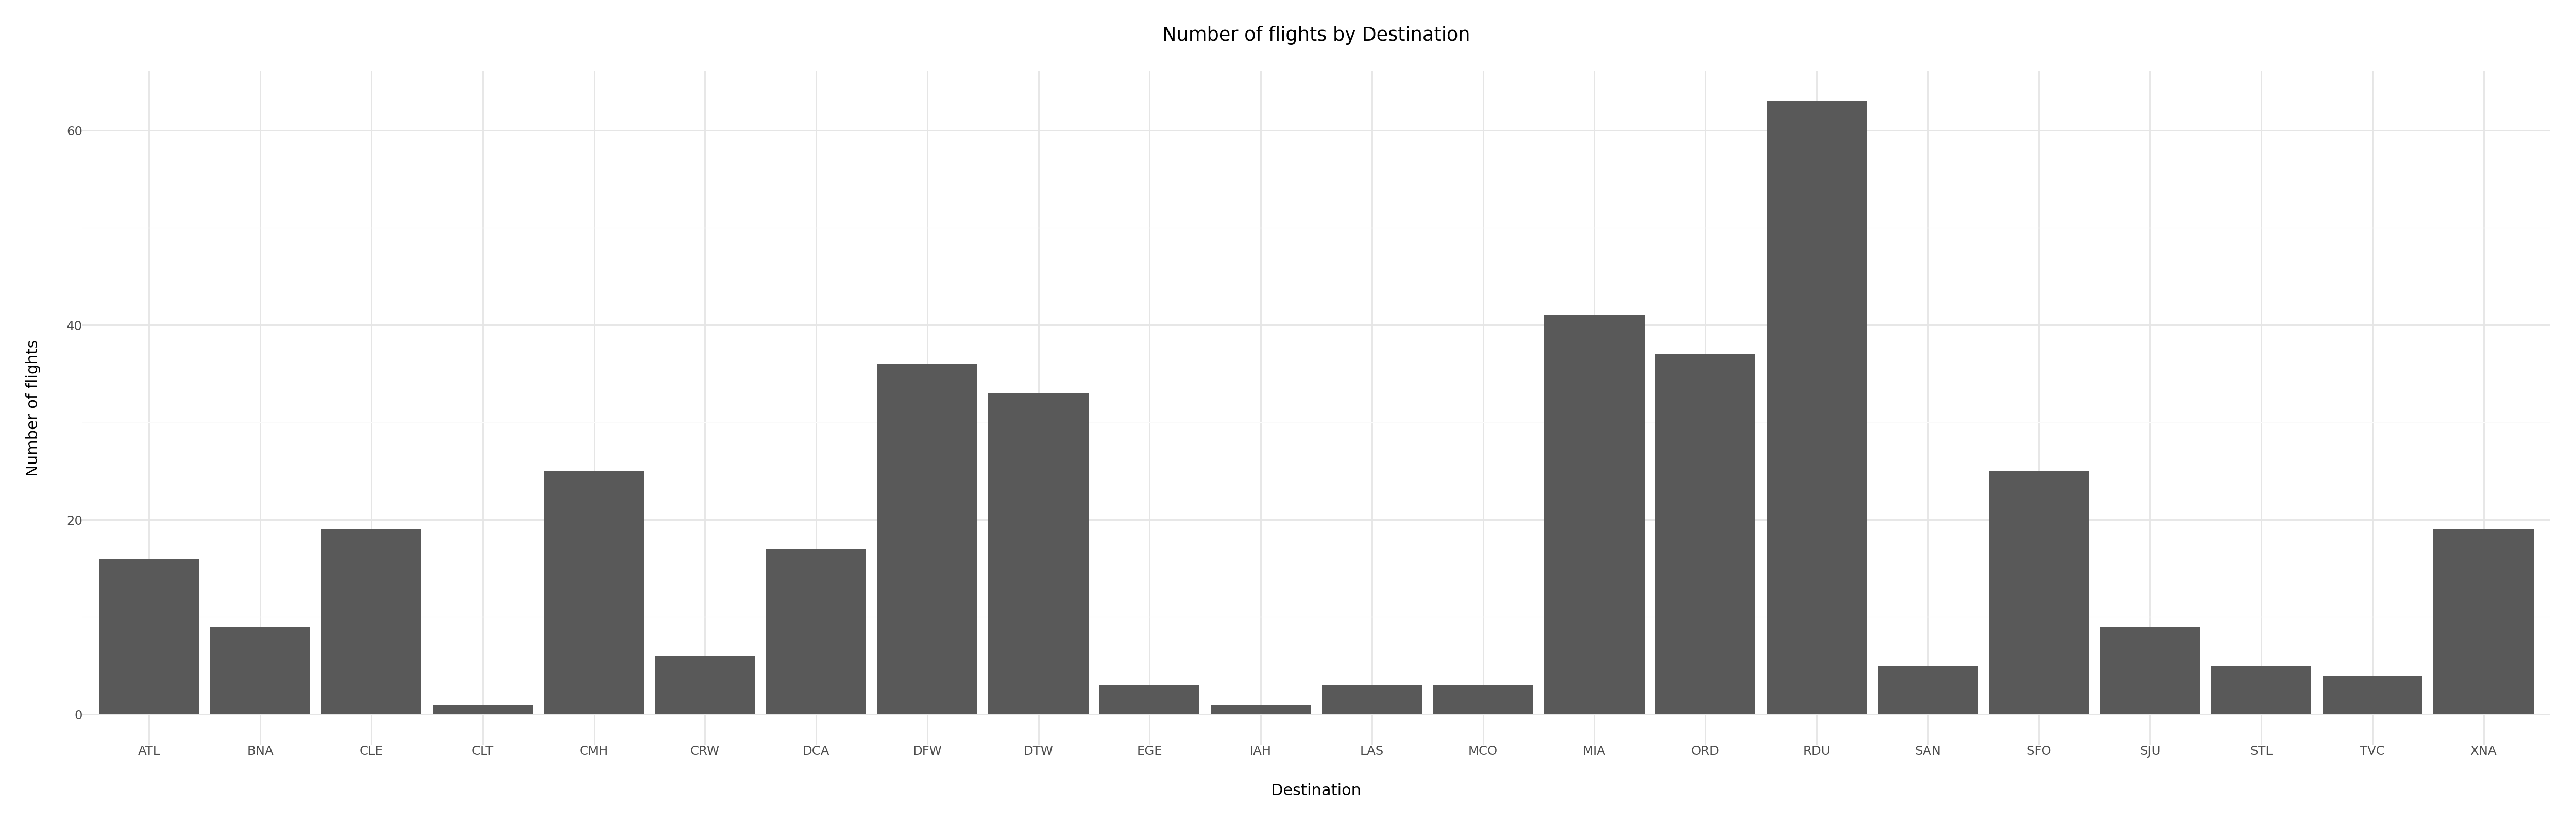